# Video Game Sales

## Import library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data 

In [5]:
vgsales = pd.read_csv('vgsales.csv')

In [6]:
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [7]:
vgsales.shape

(16598, 11)

In [8]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Their fields and data types are:**

   * Rank - Ranking of overall sales, integer
   
   * Name - The games name

   * Platform - Platform of the games release (i.e. PC,PS4, etc.), object

   * Year - Year of the game's release, float

   * Genre - Genre of the game ,object

   * Publisher - Publisher of the game, object

   * NA_Sales - Sales in North America (in millions), float

   * EU_Sales - Sales in Europe (in millions), float

   * JP_Sales - Sales in Japan (in millions), float

   * Other_Sales - Sales in the rest of the world (in millions), float

   * Global_Sales - Total worldwide sales, float

In [9]:
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [48]:
vgsales.duplicated().sum()

0

## EDA

In [72]:
sns.set()

### 1. Which game genre is released the most?

In [73]:
vgsales['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Most popular game genre')

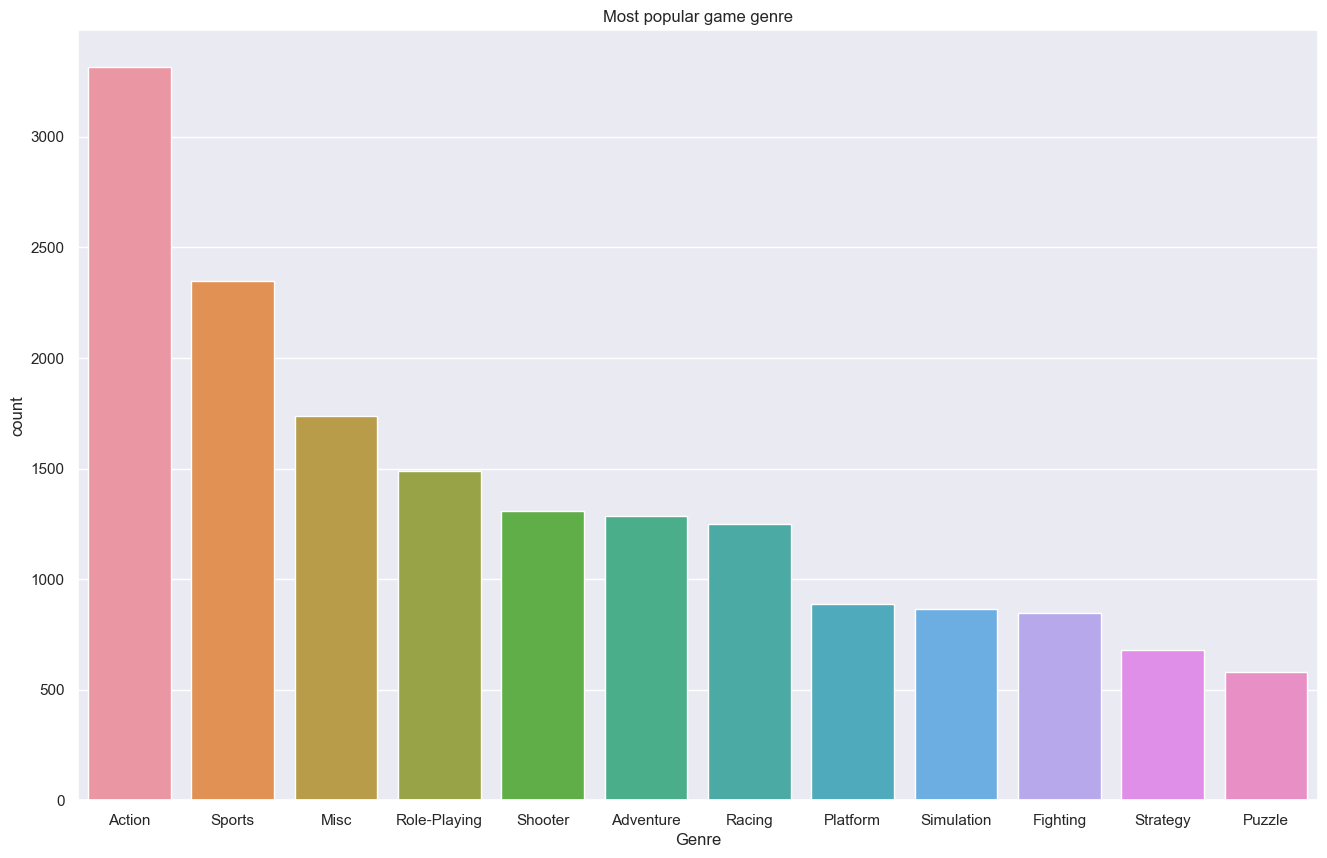

In [74]:
plt.figure(figsize=(16, 10))
sns.countplot(data=vgsales, x='Genre', order = vgsales.groupby(by=['Genre'])['Name'].count().sort_values(ascending=False).index)
plt.title('Most popular game genre')

**Action is the most popular game genre**


### 2. Which year had the most game realeased?

In [75]:
vgsales['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

Text(0.5, 1.0, 'Number of games released each year')

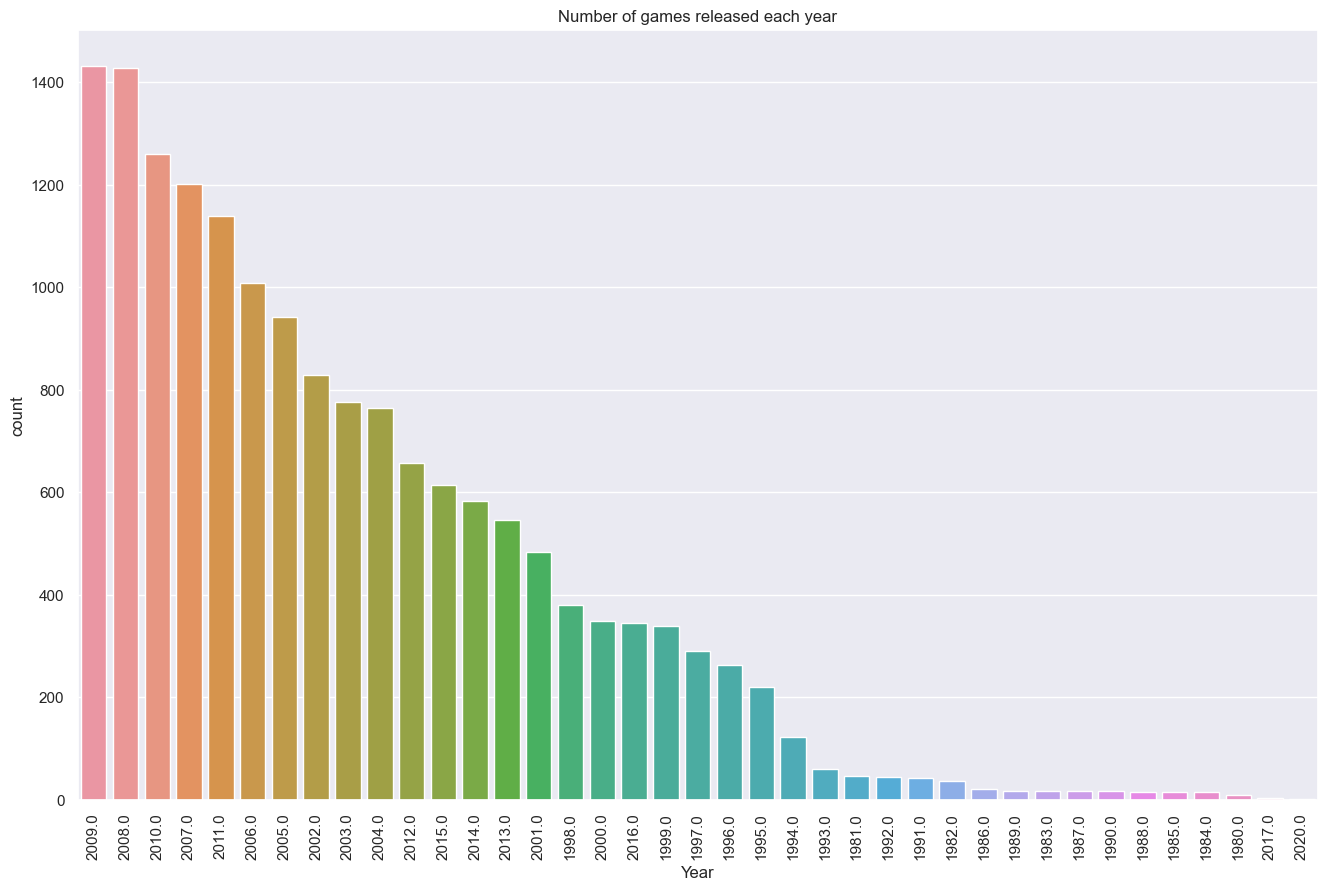

In [76]:
plt.figure(figsize=(16, 10))
sns.countplot(x="Year", data=vgsales, order = vgsales.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.title('Number of games released each year')

In [77]:
vgsales_valid_years = vgsales.dropna(subset=['Year'])
games_per_year = vgsales_valid_years['Year'].value_counts().sort_index()

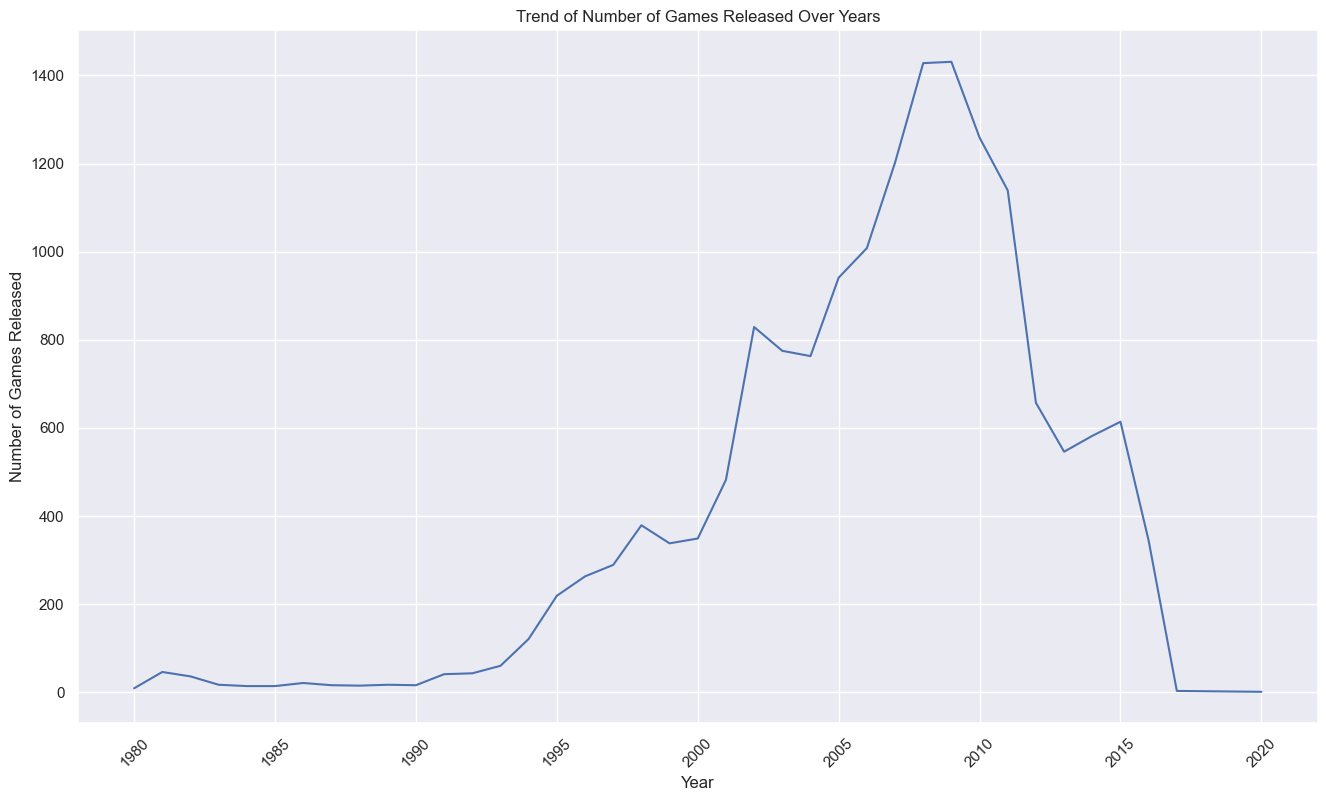

In [78]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=games_per_year.index, y=games_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Trend of Number of Games Released Over Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**As we can see, 2009 and 2008 had more than 1,400 games released.**

### 3. On what platforms are many games designed?

In [79]:
vgsales['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

Text(0.5, 1.0, 'Number of games on each platform')

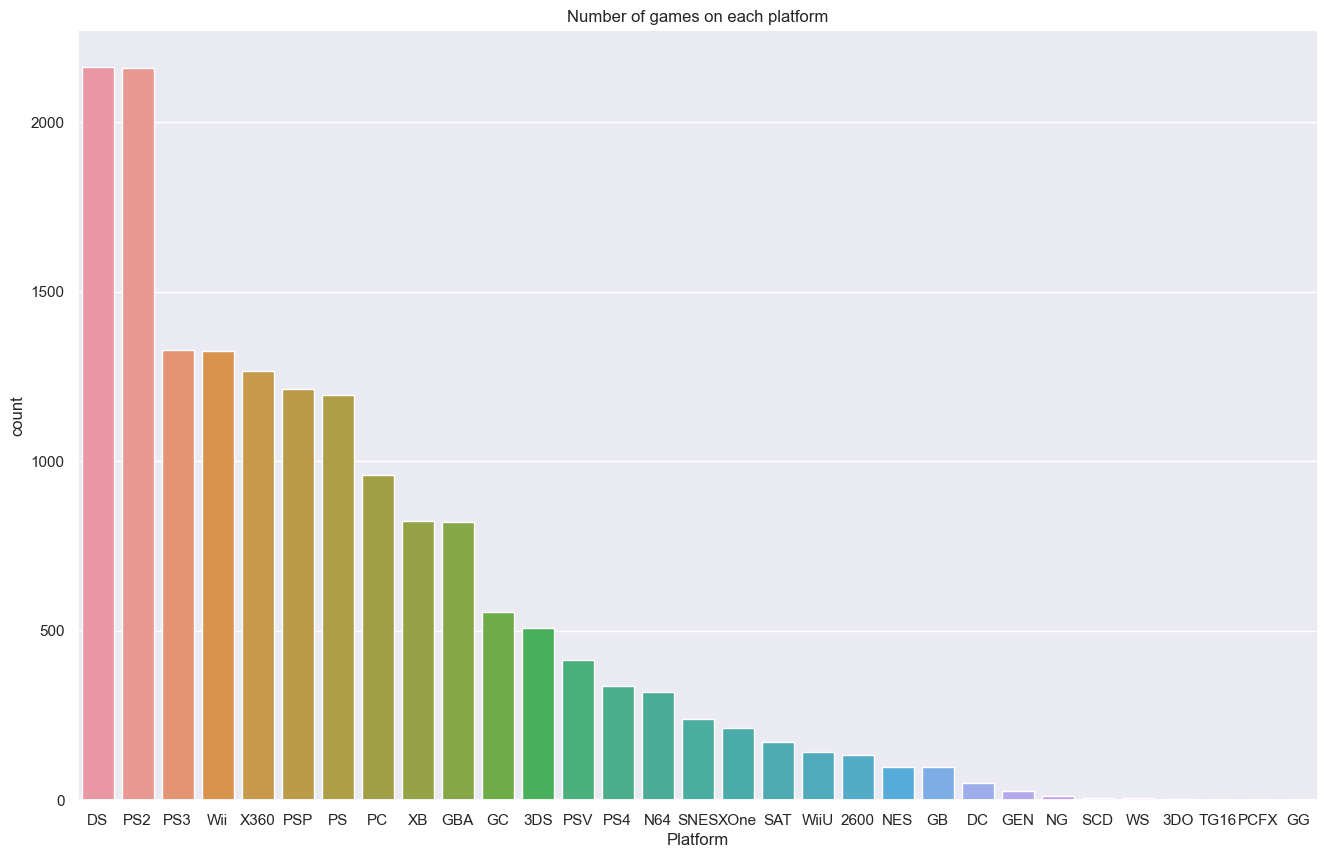

In [80]:
plt.figure(figsize=(16, 10))
sns.countplot(data=vgsales, x='Platform', order = vgsales.groupby(by=['Platform'])['Name'].count().sort_values(ascending=False).index)
plt.title('Number of games on each platform')

**DS and PS2 are the two leading platforms with many games designed for this platform**

### 4. Which game publisher releases the most games?

In [81]:
vgsales['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Square Enix'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Unknown'),
  Text(17, 0, 'Eidos Interactive'),
  Text(18, 0, 'Midway Games'),
  Text(19, 0, '505 Games')])

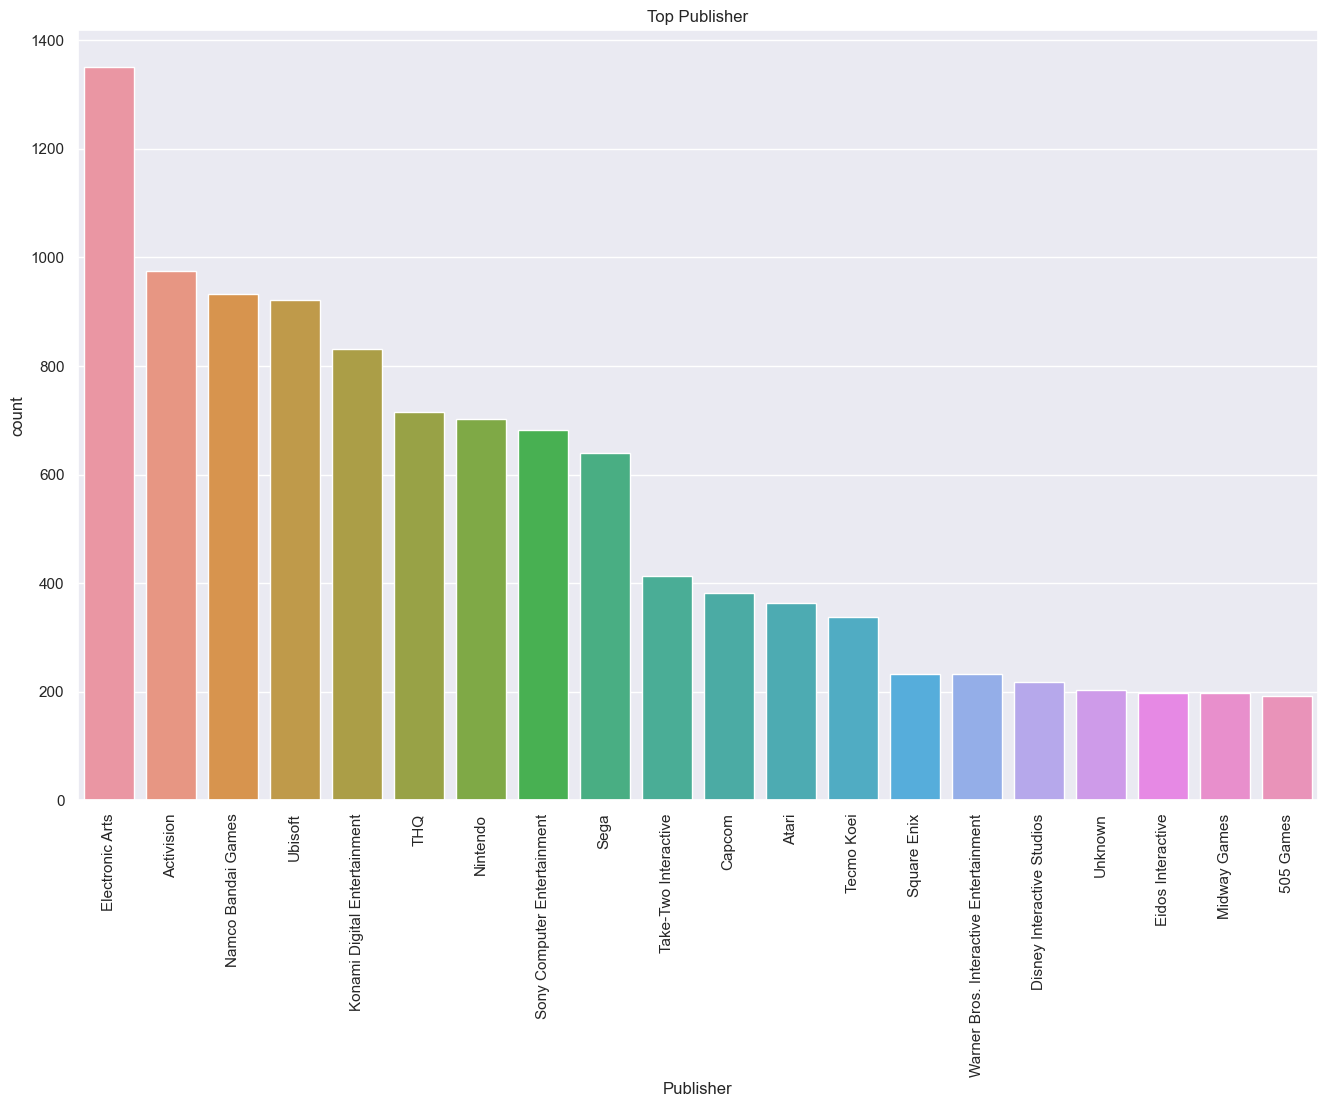

In [108]:
plt.figure(figsize=(16, 10))
sns.countplot(data=vgsales, x='Publisher', order = vgsales.groupby(by=['Publisher'])['Name'].count().sort_values(ascending=False).iloc[:20].index)
plt.title('Top Publisher')
plt.xticks(rotation=90)

**EA leads with the most games released**

### 5. Which game genre is the best-selling globally?

In [83]:
genre_sales = vgsales.groupby('Genre')[['Global_Sales']].agg('sum').reset_index()
genre_sales

,Genre,Global_Sales
0,Action,1751.18
1,Adventure,239.04
2,Fighting,448.91
3,Misc,809.96
4,Platform,831.37
5,Puzzle,244.95
6,Racing,732.04
7,Role-Playing,927.37
8,Shooter,1037.37
9,Simulation,392.20


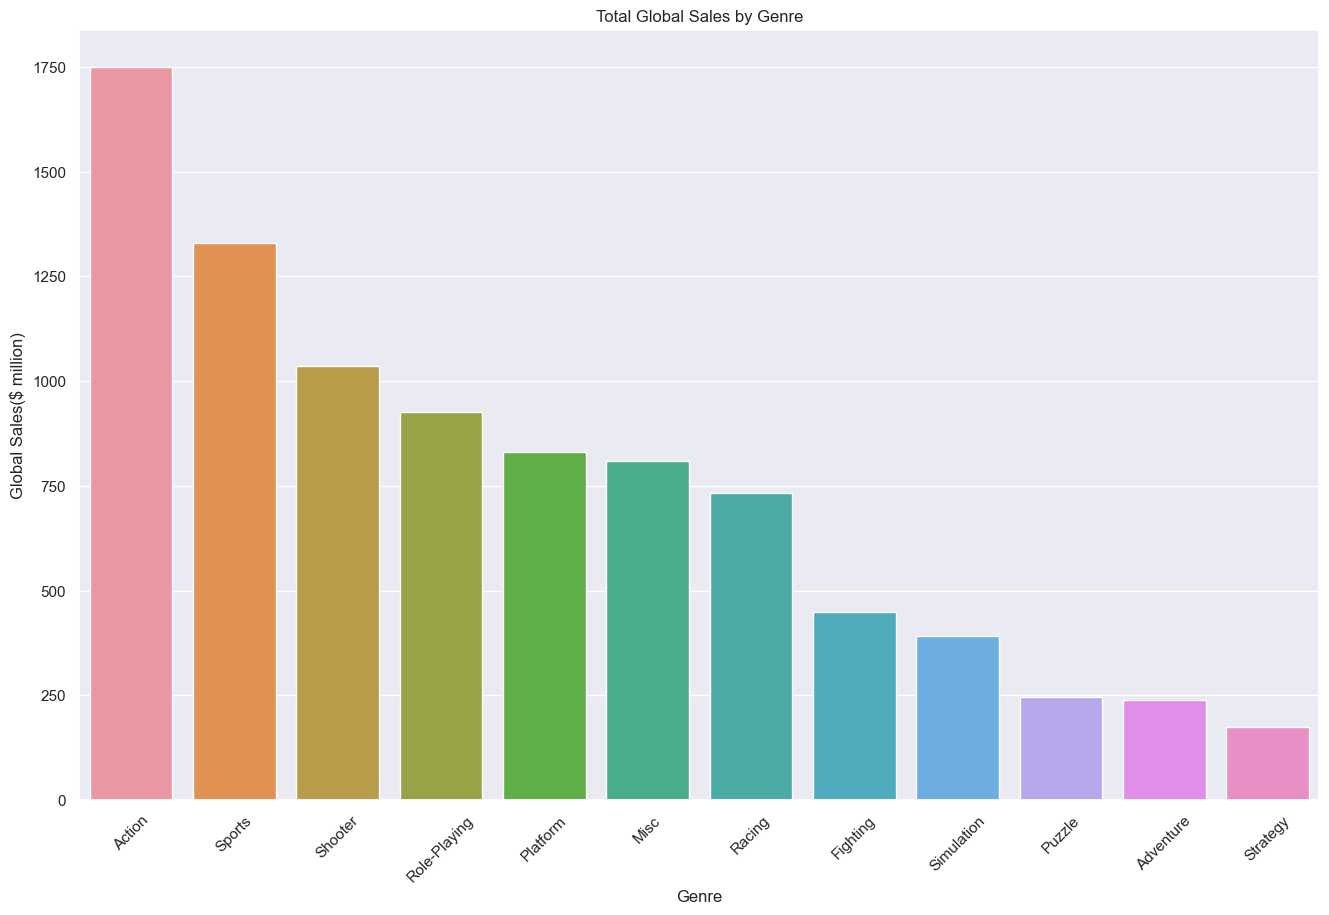

In [84]:
plt.figure(figsize=(16, 10))
sns.barplot(x='Genre', y='Global_Sales', data=genre_sales, order = genre_sales.sort_values('Global_Sales', ascending=False)['Genre'] )
plt.xlabel('Genre')
plt.ylabel('Global Sales($ million)')
plt.title('Total Global Sales by Genre')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
plt.show()

### 6. Which publisher has many best-selling games globally? 

In [85]:
publisher_sales = vgsales.groupby('Publisher')[['Global_Sales']].agg('sum').reset_index()
publisher_sales
top_10_publishers = publisher_sales.sort_values('Global_Sales', ascending=False).head(10)

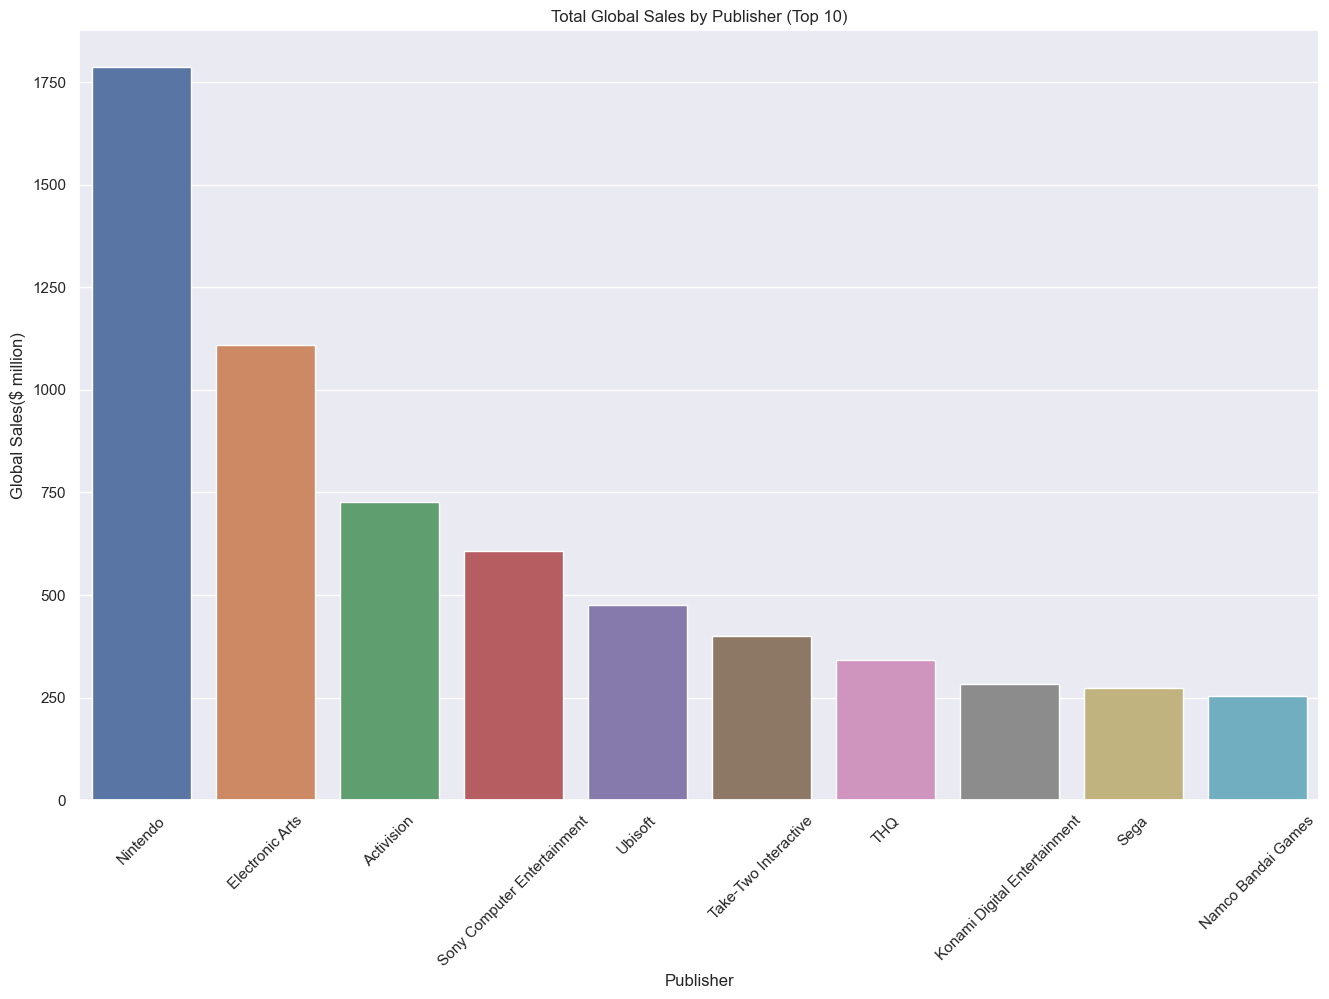

In [86]:
plt.figure(figsize=(16, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=top_10_publishers, order=top_10_publishers['Publisher'])
plt.xlabel('Publisher')
plt.ylabel('Global Sales($ million)')
plt.title('Total Global Sales by Publisher (Top 10)')
plt.xticks(rotation=45) 
plt.show()

**We can see that although Nintendo does not release as many games as EA, it has global game sales that nearly double EA's.**

### 7. What is the game that brought success to Nintendo?

In [102]:
nintendo_game = vgsales[vgsales['Publisher']=='Nintendo']
nintendo_game['Global_Sales'].sum()

1786.5600000000002

In [100]:
top_10_nintendo_game = nintendo_game.sort_values('Global_Sales', ascending=False).head(10)

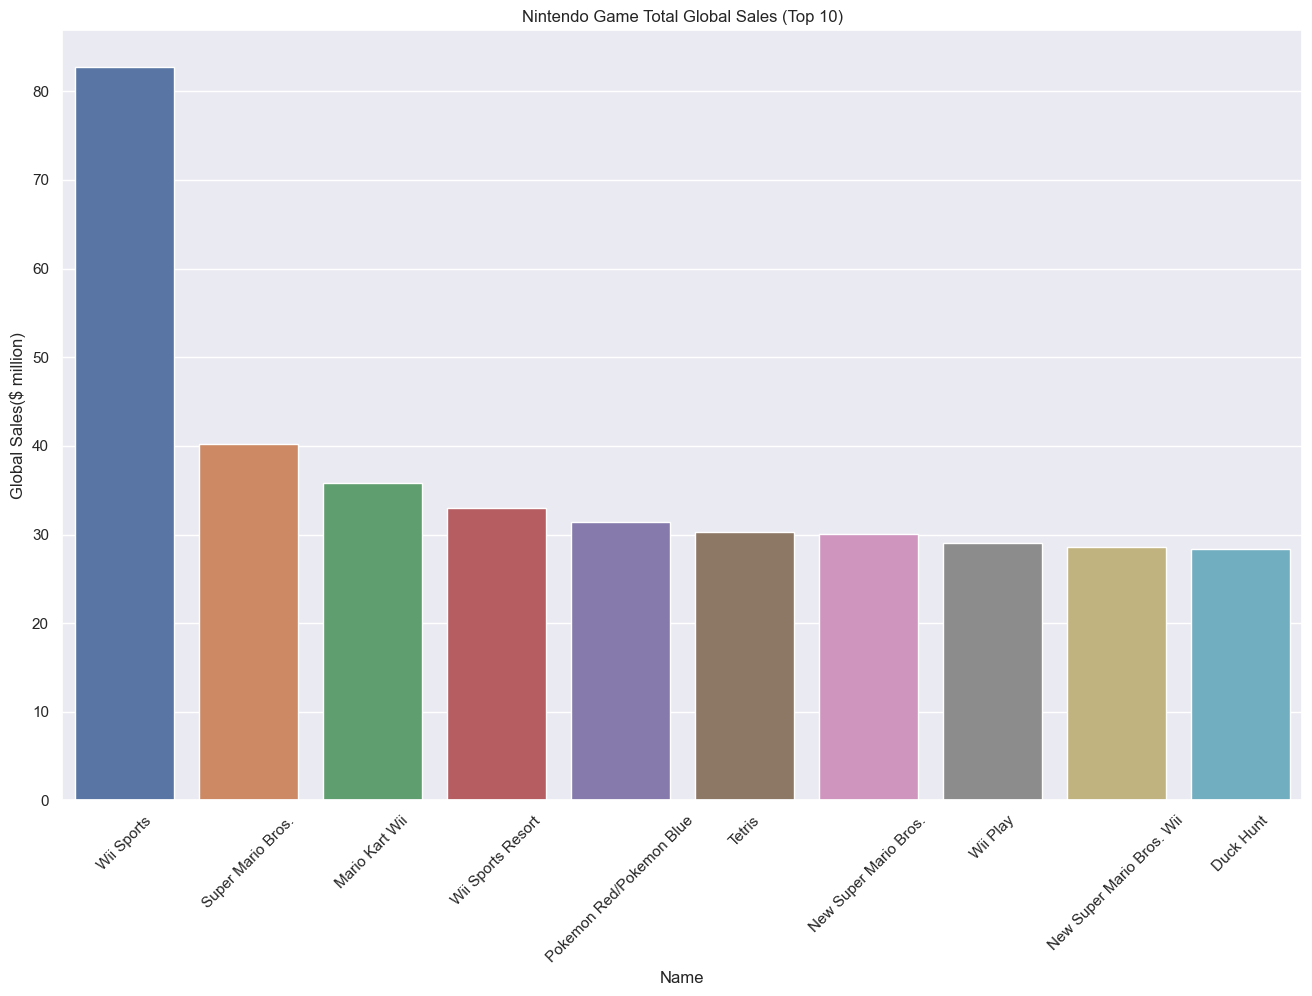

In [101]:
plt.figure(figsize=(16, 10))
sns.barplot(x='Name', y='Global_Sales', data=top_10_nintendo_game, order=top_10_nintendo_game['Name'])
plt.xlabel('Name')
plt.ylabel('Global Sales($ million)')
plt.title('Nintendo Game Total Global Sales (Top 10)')
plt.xticks(rotation=45) 
plt.show()

**It's not too surprising that Wii Sport brings high revenue to Nintendo because of this because Wii Sports has combined a series of elements such as integration with the Wii Console, accessible design, multiplayer experience and physical stimulation to become one of the best-selling games.**

In [113]:
top_10_global_game = vgsales.sort_values('Global_Sales', ascending=False).head(20)
top_10_global_game[['Publisher']].value_counts()

Publisher             
Nintendo                  17
Take-Two Interactive       2
Microsoft Game Studios     1
dtype: int64

**We can see that in the top 20 games sold on the global market, there are 17 games released by Nintendo. It can be said that Nintendo is the most successful game publisher in the world**